# PROJECT : BANKRUPTCY PREVENTION

### Business Objective: 
To predict whether a company will go bankrupt or not based on various risk and financial indicators.

### Type: 
Classification model (binary target -> bankruptcy / non- bankruptcy.

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 2. Load Dataset

In [2]:
df= pd.read_excel("Bankruptcy.xlsx", sheet_name="bankruptcy-prevention")
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


# 3.Generate Profile Report

# 4. QUICK EDA OVERVIEW

# 5. EDA

### 1. To find the information of the data./

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


#### Inference

1. The dataset has 250 rows and 7 columns.
2. No missing values — the data is complete.
3. 6 numeric columns show different risk scores; 1 column (class) shows the outcome.
4. Each numeric feature represents a specific type of business risk (like industrial or financial).
5. The data can be used to analyze or predict overall business risk levels.

### 2. find out shape of the data.

In [4]:
df.shape

(250, 7)

### 3. find out size of the data

In [5]:
df.size

1750

### 4.find out first 5 rows of the data.

In [6]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


### 5.find out last 5 rows of the data

In [7]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


### 6. find out duplicates

In [8]:
df.duplicated().sum()

np.int64(147)

### 7.remove duplicate rows

In [9]:
df.drop_duplicates(inplace=True)

### 8. shape and size of the dataset after removing duplicates

In [10]:
df.shape

(103, 7)

In [11]:
df.size

721

### 9. find out null values

In [12]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

### 10.find out unique values

In [13]:
df.nunique().sum()

np.int64(20)

### 11. Statistical summary of numerical data

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
industrial_risk,103.0,0.485437,0.404971,0.0,0.0,0.5,1.0,1.0
management_risk,103.0,0.563107,0.412308,0.0,0.0,0.5,1.0,1.0
financial_flexibility,103.0,0.504854,0.405206,0.0,0.0,0.5,1.0,1.0
credibility,103.0,0.582524,0.377668,0.0,0.5,0.5,1.0,1.0
competitiveness,103.0,0.640777,0.410747,0.0,0.5,1.0,1.0,1.0
operating_risk,103.0,0.514563,0.439788,0.0,0.0,0.5,1.0,1.0


### 12.columns in the dataset

In [15]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

### 13.Bankruptcy count

In [16]:
df["class"].value_counts()

class
non-bankruptcy    78
bankruptcy        25
Name: count, dtype: int64

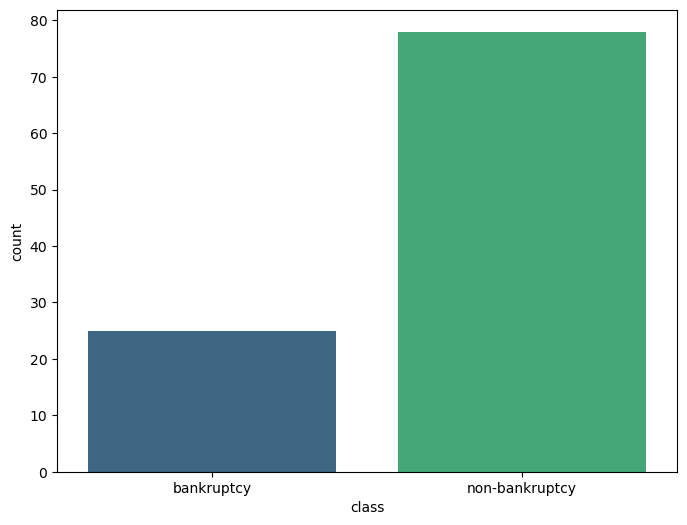

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='class', data=df, palette='viridis', legend=False)
plt.show()

## Inference from the EDA

1. In the bankruptcy dataset, initially, we have 250 rows and 7 features(columns).
2. The overall size of the dataset is 1750.
3. We observed 147 duplicates in the dataset.
4. After cleaning duplicates, we can observe the modified dataset with 103 rows and 7 columns, and the size of the dataset is 721.
5. No missing values and 20 unique values in our dataset.
6. We can observe that 76% of cases are non-bankruptcy and 24% are bankruptcy, showing a clear class imbalance in the data.
7. Due to class imbalance, the model should use methods like 'The SMOTE technique' to balance the data.

# 6. DATA VISUALIZATION

### 1. Pieplot

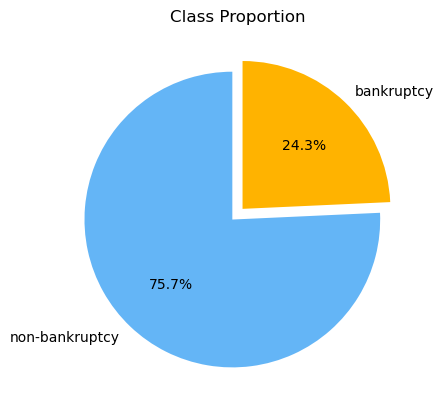

Inference:  1. We can Observe 75% are non-bankruptcy and 24 % are bankruptacy in the class. 


In [18]:
df['class'].value_counts().plot.pie(autopct='%1.1f%%', 
                                    colors=['#64b5f6','#ffb300'],
                                    startangle=90, 
                                    explode=(0.05,0.05))
plt.title('Class Proportion')
plt.ylabel('')
plt.show()

print("Inference:  1. We can Observe 75% are non-bankruptcy and 24 % are bankruptacy in the class. ")

### 2. Pairplot

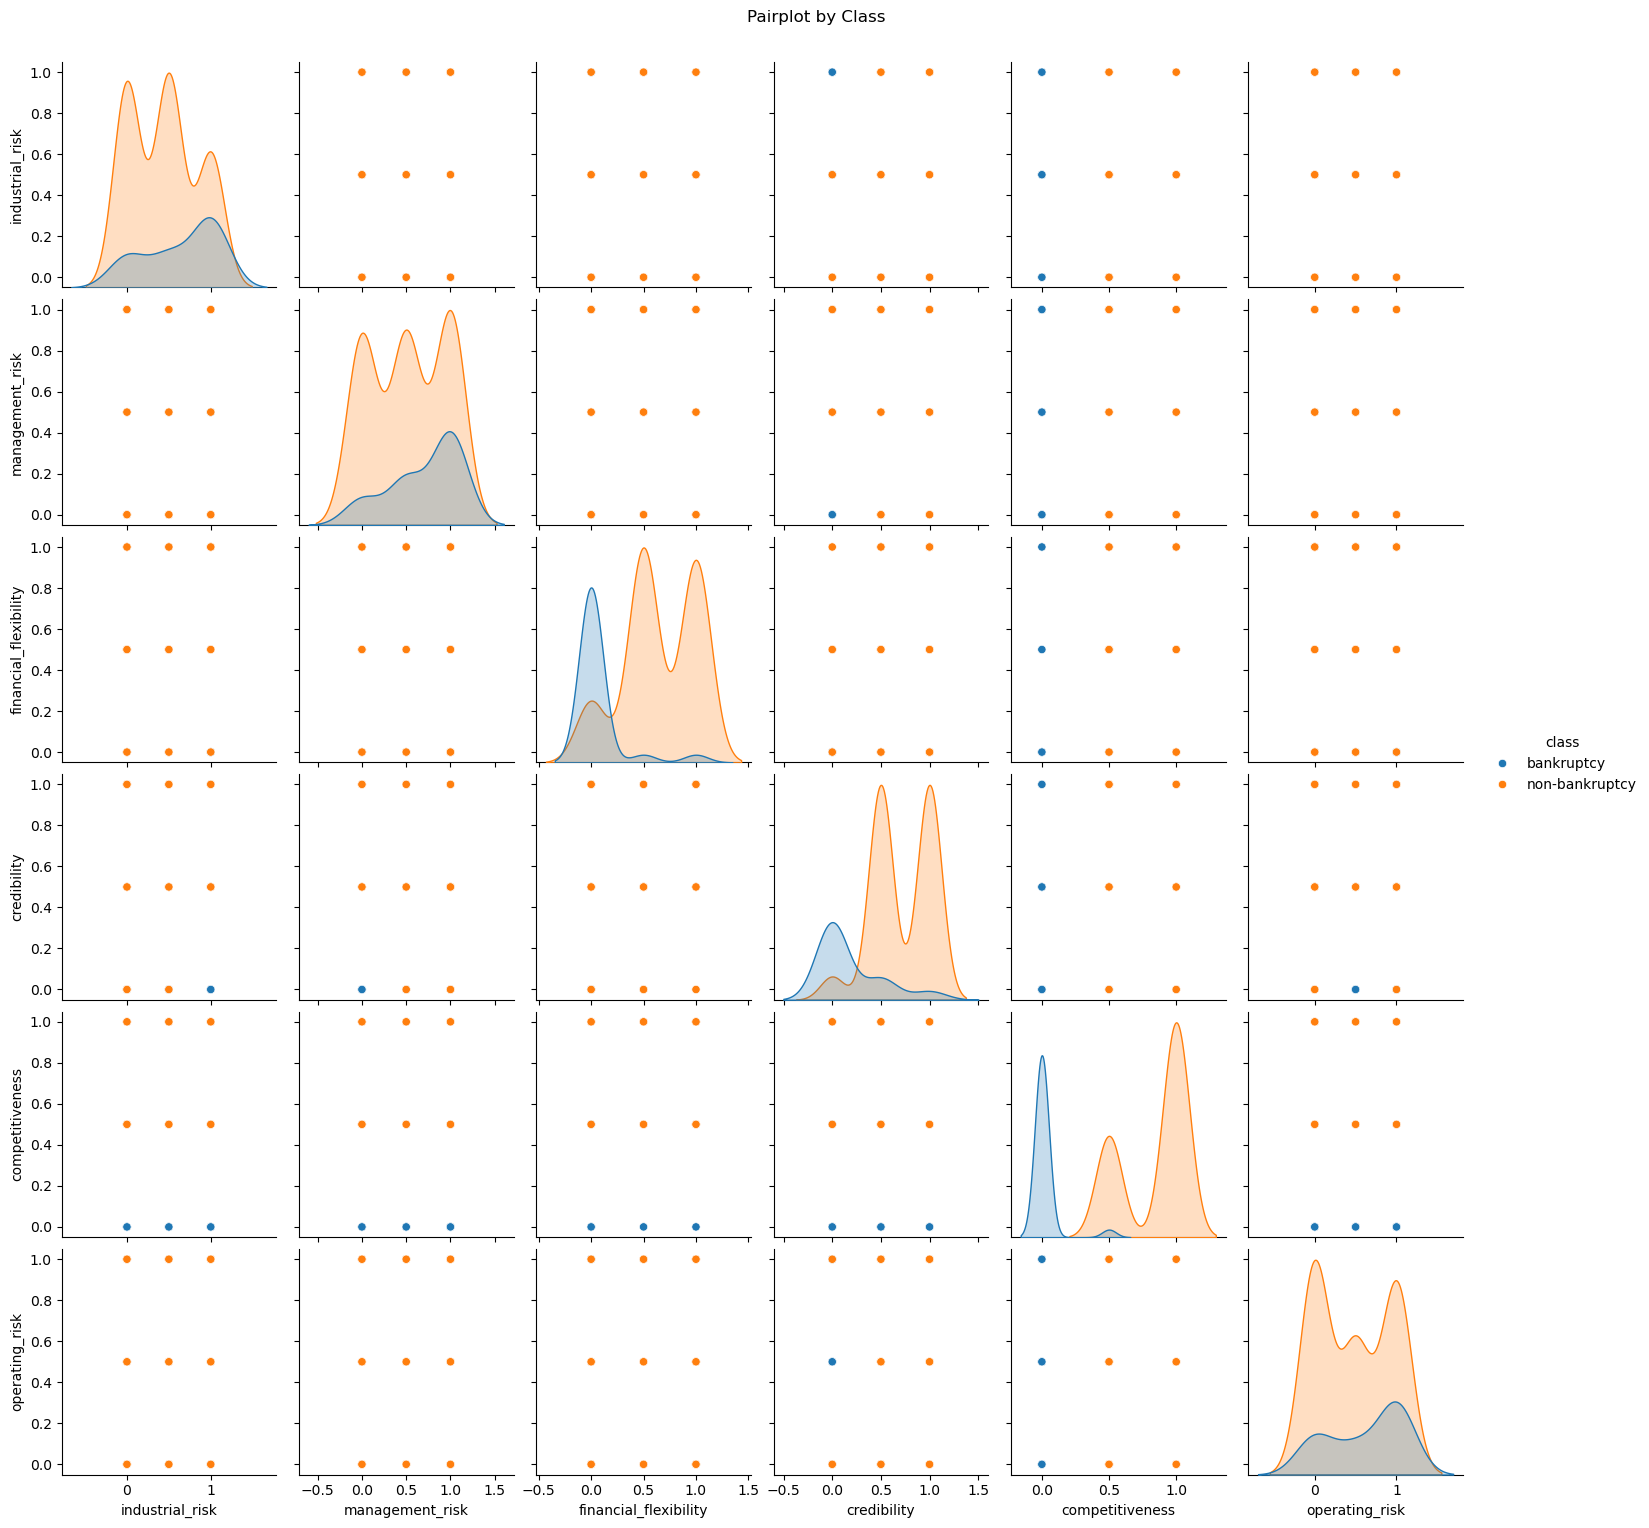

In [19]:
sns.pairplot(df, hue='class')
plt.suptitle("Pairplot by Class", y=1.02)
plt.savefig("hist.png")
plt.show()

### Inference:-
Credibility, financial flexibility, and operating risk are the most useful features for predicting bankruptcy, as they show clear separation between bankrupt and non-bankrupt companies. Other features like industrial risk and management risk show more overlap and are less informative on their own.

### 3. Heatmap

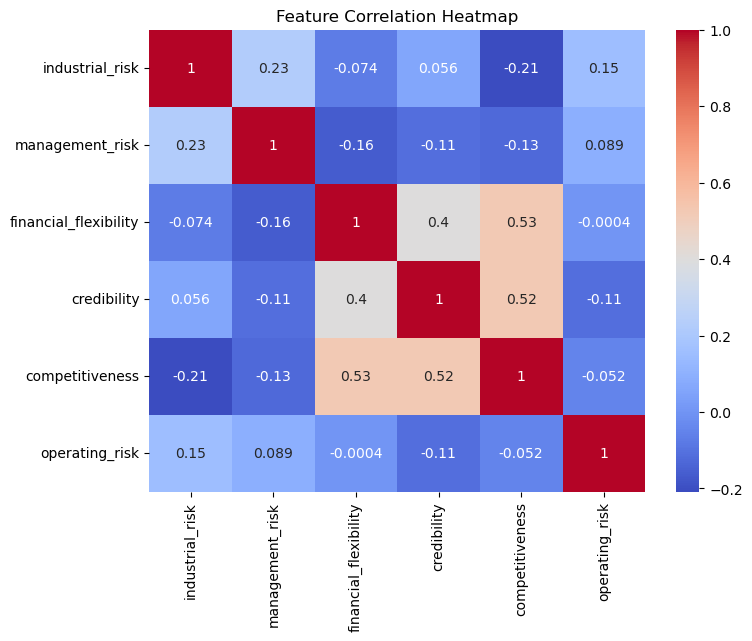

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('class', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

#### Inference
1. The features form two distinct groups that are correlated.
2. In risk features industrial_risk, management_risk, and operating_risk are all positively correlated with each other
3. In success features financial_flexibility, credibility, and competitiveness are very highly correlated with each other like credibility and competitiveness at +0.94
4. The "Risk" cluster is negatively correlated with the "Success" cluster.

### 4. Boxplot

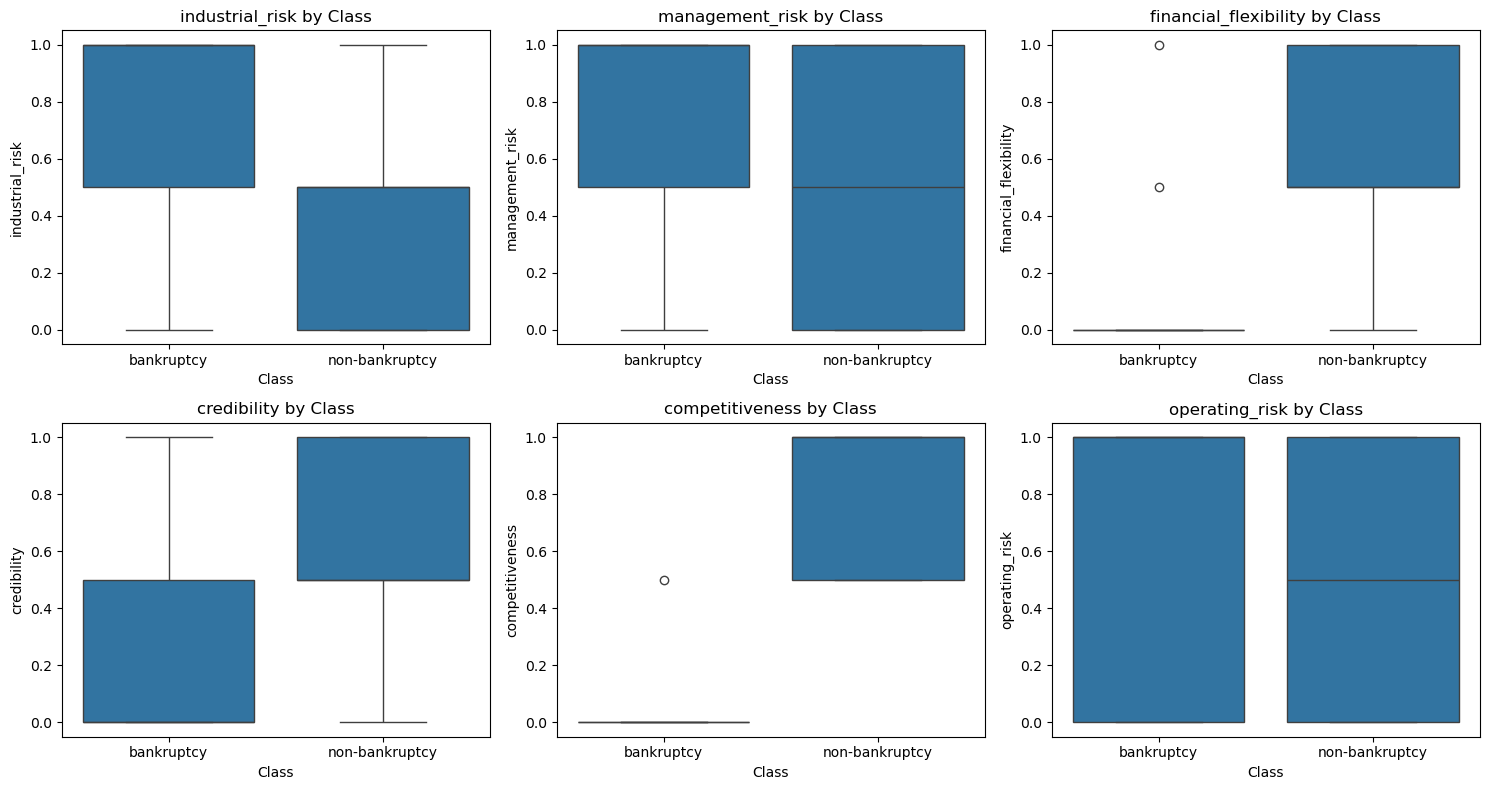

In [21]:
plt.figure(figsize=(15,8))
feature_cols = ['industrial_risk', 'management_risk', 'financial_flexibility',
                'credibility', 'competitiveness', 'operating_risk']

for i, col in enumerate(feature_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f"{col} by Class")
    plt.xlabel('Class')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Insights: -

Overview of the EDA and Data Visualization:-
1. The original dataset had many duplicates (147 rows), and after cleaning, only 103 unique records remain with no missing data, indicating better data quality for analysis.
2. The dataset is highly imbalanced: about 76% of companies are non-bankrupt while only 24% are bankrupt.
3. The features are divided into two groups that oppose each other:
    1. Risk Group: industrial_risk, management_risk, operating_risk (positively correlated)
    2. Success Group: financial_flexibility, credibility, competitiveness (highly correlated)
    3. When Risk scores are high, Success scores tend to be low, and vice versa.
4. These features have strong predictive power for bankruptcy:
   1. High scores in Success features almost always indicate non-bankruptcy.
   2. High scores in Risk features almost always indicate bankruptcy.
   3. Ambiguity mostly arises at medium scores (~0.5), where the classes overlap.
5. Because of the imbalance and overlapping medium scores, balancing methods like SMOTE are needed to help the model learn minority class patterns well.



# 7. Feature Engineering 

1. The dataset already has clear, well-defined features strongly related to bankruptcy.
2. The dataset size is small, and adding new features can increase overfitting risk.
3. Prioritizing balancing class distribution (using SMOTE) was more important than creating new features.

##### underfitting - model cannot capture pattern correctly
##### overfitting - model will perform good in train data and bad in testing data.

# 8. Data Preprocessing & Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop('class', axis=1)  # features
y = df['class'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)  #stratify used to maintain same distribution of bankruptcy in both training and testing

print("\nTrain distribution:\n", y_train.value_counts())
print("Test distribution:\n", y_test.value_counts())


Train distribution:
 class
non-bankruptcy    62
bankruptcy        20
Name: count, dtype: int64
Test distribution:
 class
non-bankruptcy    16
bankruptcy         5
Name: count, dtype: int64


# 9. Balance data using SMOTE Technique.

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Resampled training set shape: {X_train_resampled.shape}")
print("Resampled training set balance:\n", y_train_resampled.value_counts())

Resampled training set shape: (124, 6)
Resampled training set balance:
 class
bankruptcy        62
non-bankruptcy    62
Name: count, dtype: int64


# 10. Fit Models, Predict, and Evaluate

In [24]:
from sklearn.compose import ColumnTransformer # automatic 
from sklearn.preprocessing import StandardScaler, LabelEncoder # scaling the data

# Identify types for ColumnTransformer
num_cols = X.select_dtypes(include=['float64']).columns.tolist() 
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', LabelEncoder(), cat_cols)
])

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('lr', LogisticRegression(solver='liblinear'))]),  # simple dataset - fast and accuracy balance
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('dt', DecisionTreeClassifier(random_state=42))]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('rf', RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42))]),  # how many trees # max_depth = 3,5,7 
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('svc', SVC(probability=True))]),
    'KNN': Pipeline([
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier())]),
    'Gaussian NB': Pipeline([
        ('preprocessor', preprocessor),
        ('gnb', GaussianNB())])
}


Best model(s): ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Gaussian NB'] (AUC=1.0000)

===== Logistic Regression =====
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00         5
non-bankruptcy       1.00      1.00      1.00        16

      accuracy                           1.00        21
     macro avg       1.00      1.00      1.00        21
  weighted avg       1.00      1.00      1.00        21



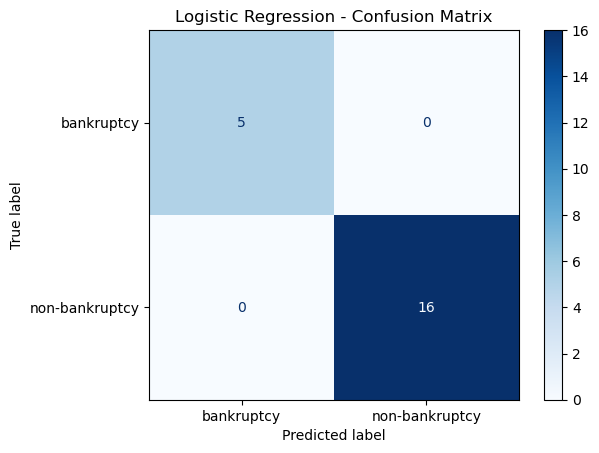

AUC: 1.0000

===== Decision Tree =====
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00         5
non-bankruptcy       1.00      1.00      1.00        16

      accuracy                           1.00        21
     macro avg       1.00      1.00      1.00        21
  weighted avg       1.00      1.00      1.00        21



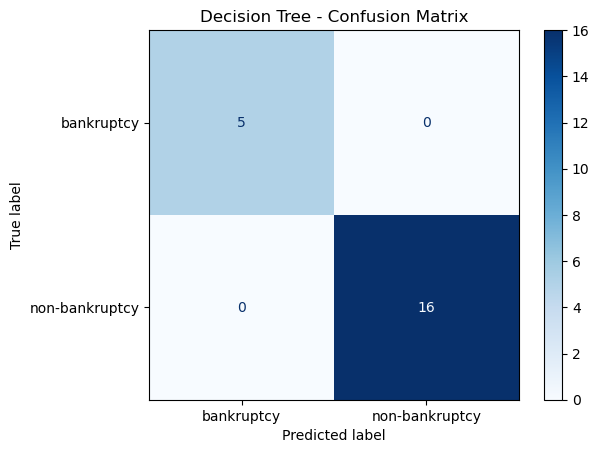

AUC: 1.0000

===== Random Forest =====
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00         5
non-bankruptcy       1.00      1.00      1.00        16

      accuracy                           1.00        21
     macro avg       1.00      1.00      1.00        21
  weighted avg       1.00      1.00      1.00        21



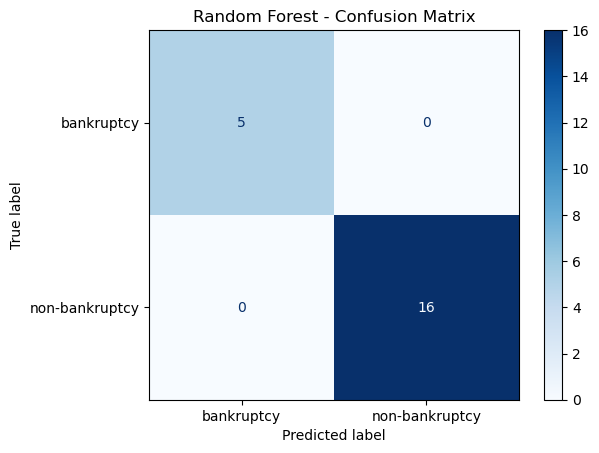

AUC: 1.0000

===== SVM =====
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00         5
non-bankruptcy       1.00      1.00      1.00        16

      accuracy                           1.00        21
     macro avg       1.00      1.00      1.00        21
  weighted avg       1.00      1.00      1.00        21



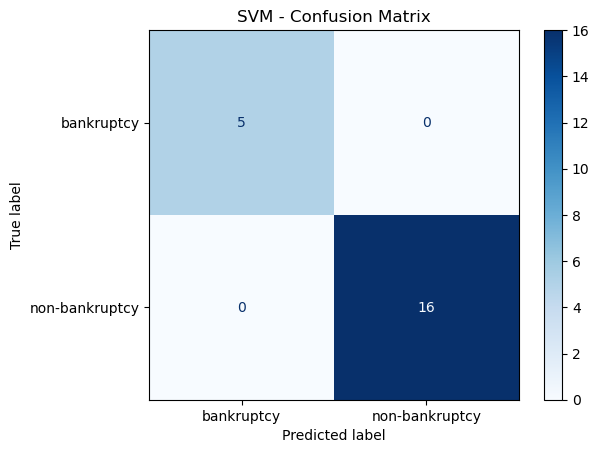

AUC: 1.0000

===== KNN =====
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00         5
non-bankruptcy       1.00      1.00      1.00        16

      accuracy                           1.00        21
     macro avg       1.00      1.00      1.00        21
  weighted avg       1.00      1.00      1.00        21



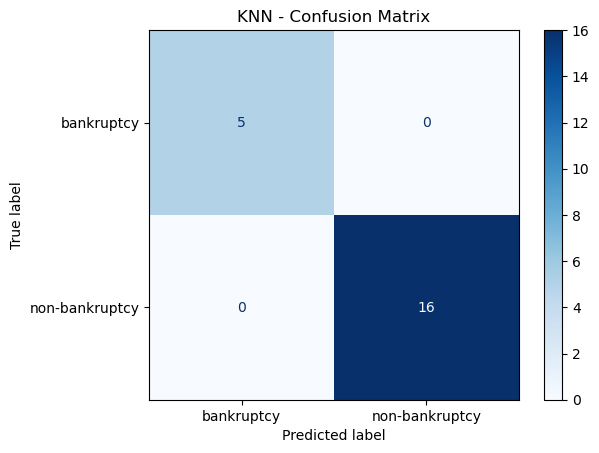

AUC: 1.0000

===== Gaussian NB =====
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00         5
non-bankruptcy       1.00      1.00      1.00        16

      accuracy                           1.00        21
     macro avg       1.00      1.00      1.00        21
  weighted avg       1.00      1.00      1.00        21



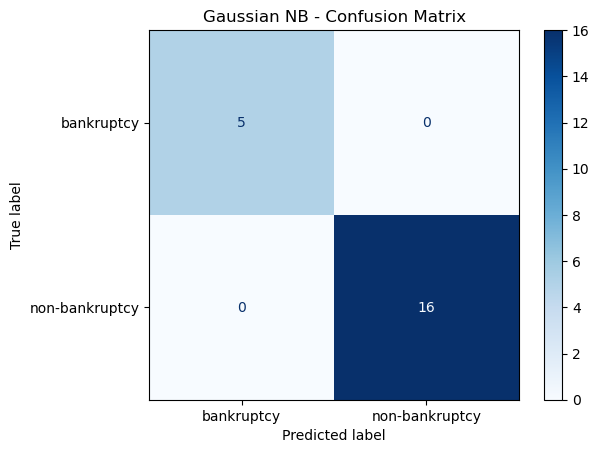

AUC: 1.0000


In [26]:
results = {}
max_auc = -1
for name, pipe in models.items():
    
    pipe.fit(X_train_resampled, y_train_resampled)
    
    y_pred = pipe.predict(X_test)
    # For AUC calculation, handle predict_proba availability
    y_prob = pipe.predict_proba(X_test)[:,1] if hasattr(pipe, "predict_proba") else y_pred
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        'auc': auc,
        'report': classification_report(y_test, y_pred, target_names=['bankruptcy','non-bankruptcy']),
        'cm': cm,
        'pipe': pipe
    }
    if auc > max_auc:
        max_auc = auc

best_models = [name for name, res in results.items() if res['auc'] == max_auc]
print(f"\nBest model(s): {best_models} (AUC={max_auc:.4f})")
for name in best_models:
    print(f"\n===== {name} =====")
    print(results[name]['report'])
    disp = ConfusionMatrixDisplay(confusion_matrix=results[name]['cm'], display_labels=['bankruptcy','non-bankruptcy'])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    print(f"AUC: {results[name]['auc']:.4f}")

1. All models have perfect scores (precision, recall, f1-score = 1.00) which means they classified all samples correctly.
2. Accuracy of 100% shows no errors in prediction on the test data.
3. AUC of 1.0000 means excellent model ability to distinguish between classes.
4. Multiple models achieved perfect performance, so any of them can be considered best.
5. Perfect scores on small test data can indicate overfitting; better if we try on larger data, then we can know how our model performs.

Choose models based on factors like simplicity, speed, or interpretability if performance is equal.

# 11. Cross-validation for Best Model(s)

In [27]:
for name in best_models:
    scorer = results[name]['pipe']
    
    scores = cross_val_score(scorer, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    
    print(f"{name} Cross-validation scores: {scores}\nMean CV Accuracy: {scores.mean():.4f}\n")

Logistic Regression Cross-validation scores: [1.         1.         1.         1.         0.95833333]
Mean CV Accuracy: 0.9917

Decision Tree Cross-validation scores: [1.         0.96       1.         1.         0.91666667]
Mean CV Accuracy: 0.9753

Random Forest Cross-validation scores: [1.         0.96       0.96       1.         0.91666667]
Mean CV Accuracy: 0.9673

SVM Cross-validation scores: [1.         1.         1.         1.         0.95833333]
Mean CV Accuracy: 0.9917

KNN Cross-validation scores: [1.         1.         1.         1.         0.91666667]
Mean CV Accuracy: 0.9833

Gaussian NB Cross-validation scores: [0.96 0.96 0.92 1.   1.  ]
Mean CV Accuracy: 0.9680



The cross-validation scores show how well the models perform on different parts of the data.

Logistic Regression and SVM scored the highest with very consistent results, which means they are very reliable.

Decision Tree and KNN also did well, but had slight drops in some folds showing minor inconsistency.

Random Forest and Gaussian NB had a few lower folds, meaning they might be a bit less stable but still perform well overall.

The mean accuracy around 97-99% confirms the models are generally accurate and not overfitting too much.

Some variation between folds is normal and indicates the model’s ability to handle different data splits.

# 12. Feature Importance from LR Model

Logistic Regression Feature Importances:
                  Feature  Importance
4        competitiveness    2.646116
2  financial_flexibility    1.288991
3            credibility    1.018445
0        industrial_risk    0.588758
1        management_risk    0.298677
5         operating_risk    0.044428


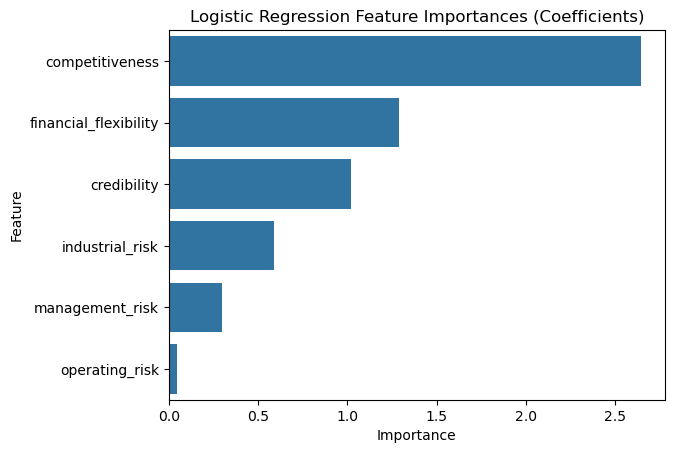

In [28]:
if 'Logistic Regression' in results:
    lr_model = results['Logistic Regression']['pipe'][-1]
    importances = abs(lr_model.coef_[0])
    imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)
    print("Logistic Regression Feature Importances:\n", imp_df)
    sns.barplot(x='Importance', y='Feature', data=imp_df, ci=None)
    plt.title("Logistic Regression Feature Importances (Coefficients)")
    plt.show()


From the Logistic Regression feature importance, we can observe that:
1. The most important feature is competitiveness, meaning it has the biggest impact on predicting bankruptcy.
2. Next important features are financial_flexibility and credibility, which also strongly influence the prediction.
3. Features like industrial_risk and management_risk have moderate influence.
4. The least important feature is operating_risk, meaning it affects predictions the least.
5. Focus on features with high importance can help improve model understanding and decision-making.

In short, the model depends mostly on competitiveness, financial flexibility, and credibility to decide on bankruptcy risk.

In [29]:
import joblib  #to save the model
joblib.dump(results['Logistic Regression']['pipe'], "bankruptcy_model.joblib")  # best model & pipeline saved in joblib
print("Model saved successfully")

Model saved successfully
